In [3]:
import pandas as pd
import numpy as np
path = 'https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv'
df= pd.read_csv(path)
df.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [7]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#Group the data using score and hours, 
#then Using bar chart ,plot score vs hours. 
#The next phase is to enter distribution scores and plot them according to the requirement,
#here we are going to enter the title, x_label, and y_label, and show it according to the desired result.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


    Scores  Hours  count
0       17    1.1      1
1       20    1.5      1
2       21    2.5      1
3       24    1.9      1
4       25    2.7      1
5       27    3.2      1
6       30    2.5      1
7       30    2.7      1
8       30    3.5      1
9       35    3.8      1
10      41    4.5      1
11      42    3.3      1
12      47    5.1      1
13      54    4.8      1
14      60    5.5      1
15      62    5.9      1
16      67    6.1      1
17      69    7.4      1
18      75    8.5      1
19      76    6.9      1
20      81    8.3      1
21      85    7.7      1
22      86    7.8      1
23      88    9.2      1
24      95    8.9      1


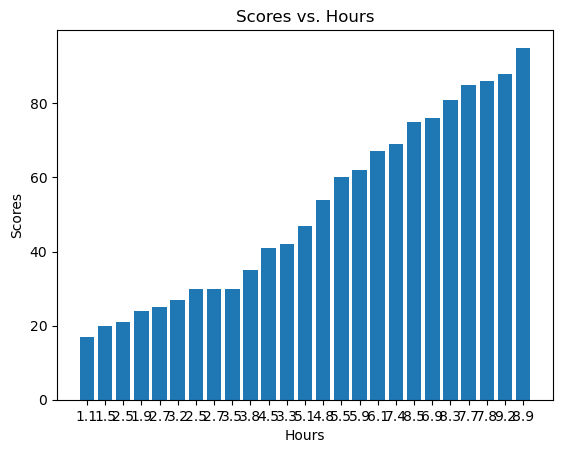

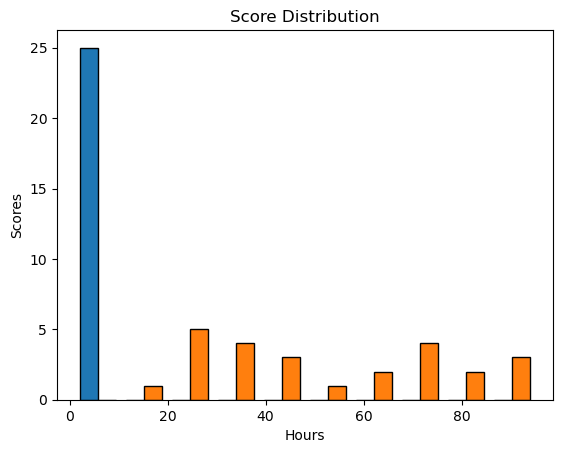

In [85]:
groupby=df.groupby(['Scores', 'Hours']).size().reset_index(name='count')
print(groupby)
scores = grouped['Hours']
hours = grouped['Scores']

plt.bar(range(len(scores)),hours)


# Customizing the chart
plt.title('Scores vs. Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Setting the x-axis labels to display "score" values
plt.xticks(range(len(scores)), scores)


# Show the bar chart
plt.show()



# Creating a distribution plot (histogram)
plt.hist(df, bins=10, edgecolor='black')

# Customizing the distribution plot
plt.title('Score Distribution')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Show the distribution plot
plt.show()



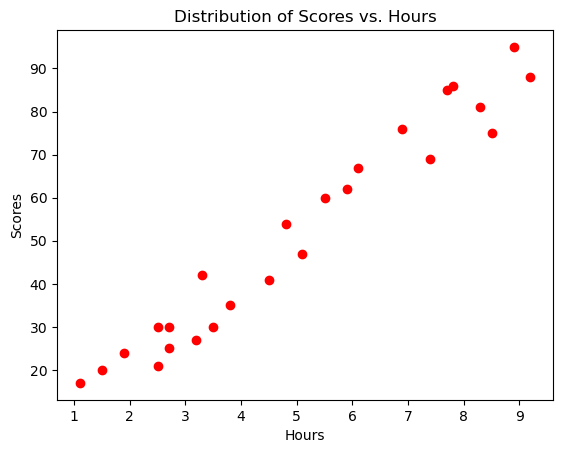

In [86]:
X = df['Hours']
y = df['Scores']
plt.scatter(X, y, label="Hours", color="Red", marker="o")

# Customize the plot with a title and labels
plt.title("Distribution of Scores vs. Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")

# Show the scatter plot
plt.show()

In [97]:
#Prepare the data by splitting it into Training and Test set
from sklearn.model_selection import train_test_split
x_data=df['Hours']
y_data = df['Scores']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 3
number of training samples: 22


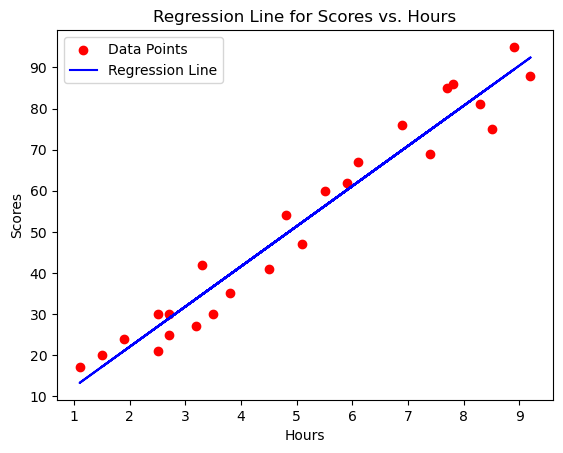

In [88]:
from sklearn.linear_model import LinearRegression

X = df[['Hours']]
y = df['Scores']

# Create and train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Predict scores using the model
y_pred = regressor.predict(X)

# Plot the data points
plt.scatter(X, y, color='red', label='Data Points')

# Plot the regression line
plt.plot(X, y_pred, color='blue', label='Regression Line')

# Customize the plot with a title and labels
plt.title("Regression Line for Scores vs. Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")

# Show the plot
plt.legend()
plt.show()

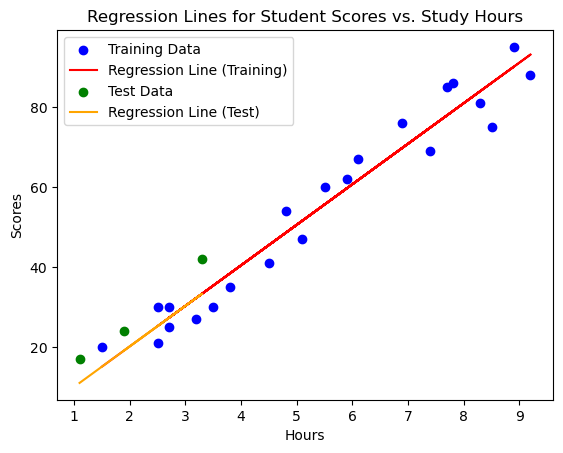


Comparison of Actual and Predicted Scores (Test Data):
     Actual  Predicted
14      17  11.120118
13      42  33.383686
17      24  19.215961


In [90]:
X = df[['Hours']]
y = df['Scores']

# Split the data into training and test sets (e.g., 80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

# Create and train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict scores for both training and test data
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, y_train_pred, color='red', label='Regression Line (Training)')

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_test_pred, color='orange', label='Regression Line (Test)')

# Customize the plot with a title and labels
plt.title("Regression Lines for Student Scores vs. Study Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")

# Show the legend
plt.legend()
plt.show()

# Compare predicted and actual scores for the test data
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nComparison of Actual and Predicted Scores (Test Data):\n", comparison)

In [91]:
from sklearn.metrics import r2_score

# Predict scores for the test data
y_test_pred = regressor.predict(X_test)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_test_pred)

print("R-squared (R2) Score accuracy:", r2)


R-squared (R2) Score accuracy: 0.6041054928963656


In [92]:
study_hours = 9.25
predicted_score = regressor.predict([[study_hours]])[0]

print(f"If a student studies for {study_hours} hours, the predicted percentage grade is: {predicted_score:.2f}")

If a student studies for 9.25 hours, the predicted percentage grade is: 93.60


/Users/ykwalled/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4.972805319866375
Mean Squared Error (MSE): 28.882730509245466
Root Mean Squared Error (RMSE): 5.374265578592619


/var/folders/42/rcc01cys6f5554c36g0699g40000gn/T/ipykernel_59815/3099313130.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores, color="blue")


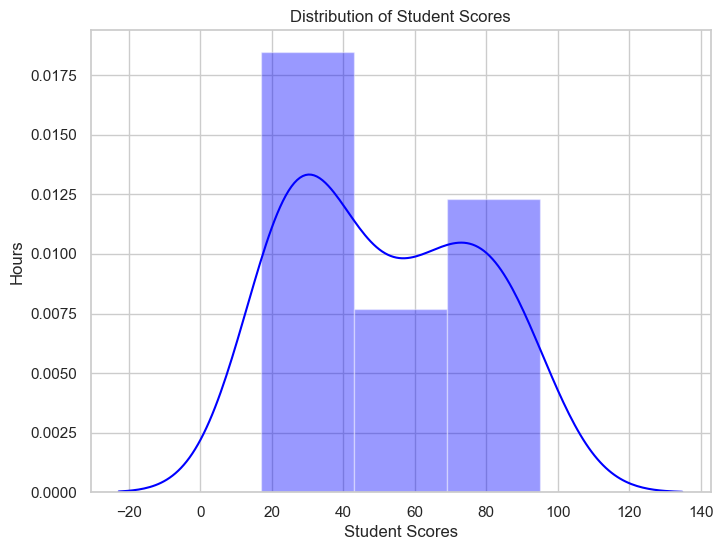

In [98]:
import seaborn as sns
scores = df['Scores']

# Create a distribution plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.distplot(scores, color="blue")

# Customize the plot with a title and labels
plt.title("Distribution of Student Scores")
plt.xlabel("Student Scores")
plt.ylabel("Hours")

# Show the distribution plot
plt.show()